In [47]:
from dataset import Dataset
from trainer import Trainer
import torch
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from label_processing import word_pickup_all
from reporter import Reporter

In [48]:
t = Trainer(optimizer=torch.optim.Adam, hidden_size=300, batch_size=32, pad_idx=1,
            wordemb_path='/home/s14t284/Desktop/wordembed50/all_vectors.txt',
            charemb_path='/home/s14t284/Desktop/charembed50_5/all_vectors.txt',
            train_path='train.txt', test_path='test.txt')

[1,   209] loss: 1669.049
[2,   418] loss: 1071.302
[3,   627] loss: 775.247
[4,   836] loss: 613.032
[5,  1045] loss: 483.585
[6,  1254] loss: 389.127
[7,  1463] loss: 316.640
[8,  1672] loss: 268.311
[9,  1881] loss: 224.656
[10,  2090] loss: 209.218
[11,  2299] loss: 174.810
[12,  2508] loss: 153.316
[13,  2717] loss: 128.769
[14,  2926] loss: 116.116
[15,  3135] loss: 91.052
[16,  3344] loss: 81.193
[17,  3553] loss: 56.675
[18,  3762] loss: 51.396
[19,  3971] loss: 43.908
[20,  4180] loss: 43.442
[21,  4389] loss: 40.139
[22,  4598] loss: 35.264
[23,  4807] loss: 29.069
[24,  5016] loss: 24.606
[25,  5225] loss: 29.140
[26,  5434] loss: 26.746
[27,  5643] loss: 22.830
[28,  5852] loss: 17.737
[29,  6061] loss: 21.149
[30,  6270] loss: 17.581
[31,  6479] loss: 20.191
[32,  6688] loss: 18.032
[33,  6897] loss: 14.303
[34,  7106] loss: 14.220
[35,  7315] loss: 10.334
[36,  7524] loss: 12.887
[37,  7733] loss: 11.644
[38,  7942] loss: 10.129
[39,  8151] loss: 7.817
[40,  8360] loss: 1

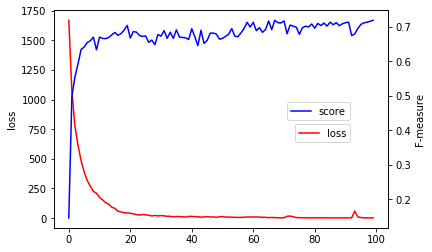

In [49]:
t.train(100)

In [ ]:
t.model.load('weight.pth')

In [50]:
iterator = t.test.return_batch(t.batch_size)
predict = []
answer = []
sentence = []
# テストセットに対して，ラベルの予測を行う
for i, data in enumerate(iterator):
    with torch.no_grad():
        word = t.test.WORD.vocab.vectors[data.word]
        char = t.test.CHAR.vocab.vectors[data.char]
        mask = data.word != 1
        mask = mask.float()
        x = {'word': word, 'char': char}
        decode = t.model.decode(x, mask)

        for pred, ans, c in zip(decode, data.label, data.char):
            answer.append([t.test.LABEL.vocab.itos[i] for i in ans[:len(pred)]])
            predict.append([t.test.LABEL.vocab.itos[i] for i in pred])
            sentence.append([t.test.CHAR.vocab.itos[i] for i in c[:len(pred)]])

In [72]:
# 既知単語の収集
iterator = t.dataset.return_batch(t.batch_size)
train_sentence = []
train_labels = []

for i, data in enumerate(iterator):
        with torch.no_grad():
            word = t.dataset.WORD.vocab.vectors[data.word]
            char = t.dataset.CHAR.vocab.vectors[data.char]
            mask = data.word != 1
            mask = mask.float()
            x = {'word': word, 'char': char}
            decode = t.model.decode(x, mask)
            for pred, label, c in zip(decode, data.label, data.char):
                train_sentence.append([t.dataset.CHAR.vocab.itos[i] for i in c[:len(pred)]])
                train_labels.append([t.dataset.LABEL.vocab.itos[i] for i in label[:len(pred)]])

print(train_sentence[-10:])

[['東', '京', 'の', 'デ', 'パ', 'ー', 'ト', 'で', '行', '列', 'の', 'で', 'き', 'る', '人', '気', '店', 'の', '「', 'ガ', 'ト', 'ー', 'フ', 'ェ', 'ス', 'タ', '・', 'ハ', 'ラ', 'ダ', '」', 'の', '「', 'グ', 'ー', 'テ', '・', 'デ', '・', 'ロ', 'ワ', '・', 'ホ', 'ワ', 'イ', 'ト', 'シ', 'ョ', 'コ', 'ラ', '」', 'と', '食', '感', 'が', '<unk>', 'て', 'い', 'て', '、', 'ラ', 'ス', 'ク', 'の', 'よ', 'う', 'な', 'パ', 'イ', '生', '地', 'に', 'ホ', 'ワ', 'イ', 'ト', 'チ', 'ョ', 'コ', 'の', '甘', '味', 'が', '絶', '<unk>', 'な', 'バ', 'ラ', 'ン', 'ス', 'で', 'マ', 'ッ', 'チ', 'し', 'て', 'い', 'て', 'と', 'て', 'も', '美', '味', 'し', 'く', 'て', '会', '社', 'で', 'も', '好', '評', 'で', 'し', 'た', '。'], ['北', '海', '道', 'に', 'は', '北', '菓', '<unk>', 'の', '「', '<unk>', '<unk>', 'の', '森', '」', '、', '石', '屋', '製', '菓', 'の', '白', 'い', 'バ', 'ー', 'ム', 'ク', 'ー', 'ヘ', 'ン', '「', 'T', 'U', 'M', 'U', 'G', 'I', '」', '、', '柳', '月', 'の', '「', '三', '方', '六', '」', 'と', '人', '気', 'の', 'バ', 'ー', 'ム', 'ク', 'ー', 'ヘ', 'ン', 'が', '沢', '山', 'あ', 'り', 'ま', 'す', 'が', '、', '「', 'ね', 'ん', 'り', 'ん', '家', '」', 'の', 'バ', 'ー', 'ム', 'ク', '

In [51]:
print(len(answer))
for i in range(len(answer)):
    if not answer[i] == predict[i]:
        print(answer[i])
        print(predict[i])
        print(sentence[i])        

476
['B-SHO', 'I-SHO', 'O', 'B-PRO', 'I-PRO', 'I-PRO', 'I-PRO', 'I-PRO', 'O', 'B-PRO', 'I-PRO', 'I-PRO', 'I-PRO', 'O']
['B-PRO', 'I-PRO', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PRO', 'I-PRO', 'I-PRO', 'I-PRO', 'O']
['舟', '和', 'の', '芋', 'よ', 'う', 'か', 'ん', 'と', 'あ', 'ん', 'こ', '玉', '。']
['O', 'B-PRO', 'I-PRO', 'I-PRO', 'B-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-SHO', 'I-SHO', 'O']
['☆', '萩', 'の', '月', '（', '仙', '台', '␣', '菓', '匠', '␣', '三', '全', '）']
['O', 'O', 'O', 'O', 'B-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'O', 'O', 'O']
['B-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'I-SHO', 'O', 'O', 'O']
['秋', '田', '県', '␣', 'ゆ', 'か', 'り', '堂', '製', '菓', 'さ', 'ん', 'の']
['B-SHO', 'I-SHO', 'I-SHO', 'O', 'O', 'B-PRO', 'I-PRO', 'I-PRO', 'I-PRO', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['も', 'ち', '吉', '「', '␣', 'も', 'ち', 'の',

In [52]:
classification_report(answer, predict)

'             precision    recall  f1-score   support\n\n        SHO       0.82      0.68      0.74       273\n        PRO       0.74      0.67      0.70       423\n\navg / total       0.77      0.67      0.72       696\n'

In [76]:
reporter = Reporter()
known_words = word_pickup_all(train_sentence, train_labels, ['PRO', 'SHO'])
reporter.save_closs_validate_result(answer, predict, sentence, known_words)
reporter.show_experiment_report('result/', t.test.LABEL.vocab.itos)

========== all ==========
     precision    recall  f1-score
PRO   0.737662  0.671395  0.702970
SHO   0.822222  0.677656  0.742972
========== unknown ==========
     precision    recall  f1-score
PRO   0.684211  0.647975  0.665600
SHO   0.755396  0.576923  0.654206
========== known ==========
     precision    recall  f1-score
PRO   0.917647  0.715596  0.804124
SHO   0.891304  0.845361  0.867725
